# Time Range Visualizations

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Setup

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from pyparsing.util import col

In [3]:
def getPivot(dataframe, indexCol):
    dfPivot = dataframe.copy(); 
    if indexCol == "Date":
        dfPivot[indexCol] = pd.to_datetime(dfPivot[indexCol], format='%Y-%m');
    dfPivot.index = dfPivot[indexCol];
    del dfPivot[indexCol];
    return dfPivot;

In [4]:
def getTransposedDataframe(dataframe, hueColumn, xColumn):
  data = [];
  for i in range(len(dataframe[hueColumn].unique().tolist())):
    for j in range(len(dataframe.columns.tolist()[1:])):
      row = [dataframe[hueColumn].unique().tolist()[i]];
      row.append(dataframe.columns.tolist()[1:][j]);
      row.append(dataframe.loc[i, dataframe.columns.tolist()[1:][j]]);
      data.append(row);
  dfTransposed = pd.DataFrame(data, columns=[hueColumn,xColumn,"Total Cases"]);
  return dfTransposed;

In [5]:
# timeRangeDataPath = "/content/drive/MyDrive/Coursework/Co-op Winter 2022/2021 SHS Statistics Analysis/Time Range data.xlsx";
timeRangeDataPath = "3_analyzedData/Time Range data.xlsx";

Time Range

<AxesSubplot:title={'center':'Total Cases per Time Range in 2021'}, xlabel='Time Range', ylabel='Total Cases'>

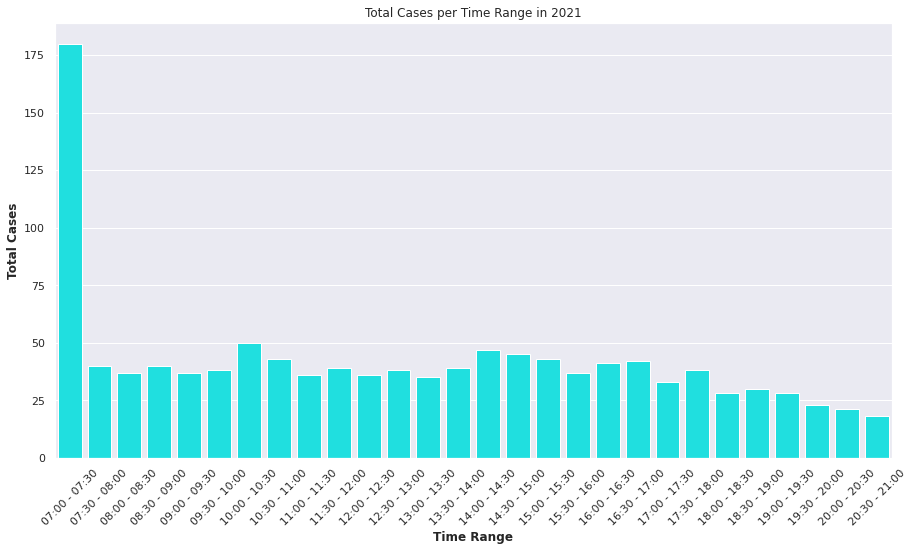

In [6]:
df_timeRange = pd.read_excel(timeRangeDataPath, sheet_name="Time Range");

# Reference:
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# https://www.statology.org/seaborn-figure-size/https://www.statology.org/seaborn-figure-size/
# https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/

def getBarChart_TimeRange(dataframe_timeRange, xColumn):
    dfPivot = getPivot(dataframe_timeRange, xColumn);
    with sns.axes_style("darkgrid"):
      sns.set(rc = {'figure.figsize':(15,8)});
      chart = sns.barplot(data=dfPivot, x=dfPivot.index, y="Total Cases", color="cyan");
      plt.ylabel("Total Cases", fontweight="bold");
      plt.xlabel(xColumn, fontweight="bold");
      plt.title(f"Total Cases per {xColumn} in 2021");
      # plt.xticks(rotation=320);
      plt.xticks(rotation=45);
    return chart;

barChart_TimeRange = getBarChart_TimeRange(df_timeRange, "Time Range");
barChart_TimeRange

Time of Day

<AxesSubplot:title={'center':'Total Cases per Time of Day in 2021'}, xlabel='Time of Day', ylabel='Total Cases'>

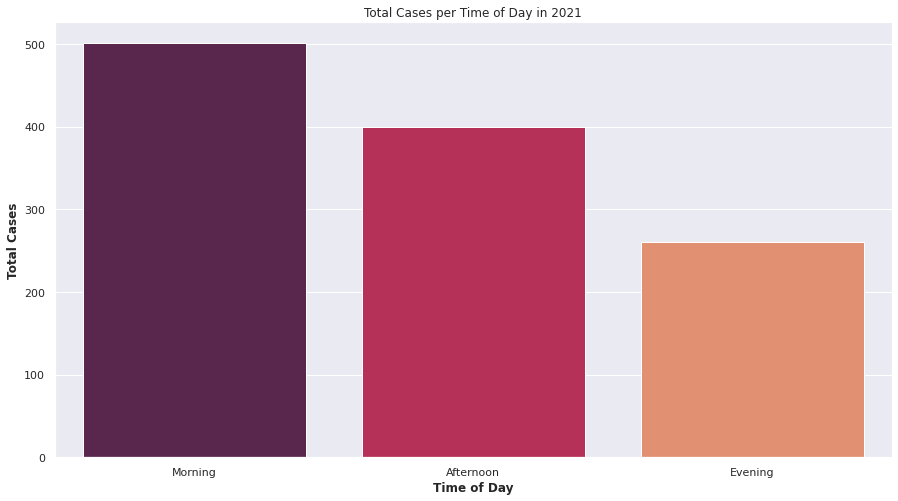

In [7]:
df_timeOfDay = pd.read_excel(timeRangeDataPath, sheet_name="Time of Day");

# Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html

def getBarChart_TimeOfDay(dataframe_timeOfDay, xColumn):
    dfPivot = getPivot(dataframe_timeOfDay, xColumn);
    with sns.axes_style("darkgrid"):
      sns.set(rc = {'figure.figsize':(15,8)});
      chart = sns.barplot(data=dfPivot, x=dfPivot.index, y="Total Cases", palette="rocket");
      plt.ylabel("Total Cases", fontweight="bold");
      plt.xlabel(xColumn, fontweight="bold");
      plt.title(f"Total Cases per {xColumn} in 2021");
    return chart;

barChart_TimeOfDay = getBarChart_TimeOfDay(df_timeOfDay, "Time of Day");
barChart_TimeOfDay

Semester

<AxesSubplot:title={'center':'Total Cases per Time Range by Semester in 2021'}, xlabel='Time Range', ylabel='Total Cases'>

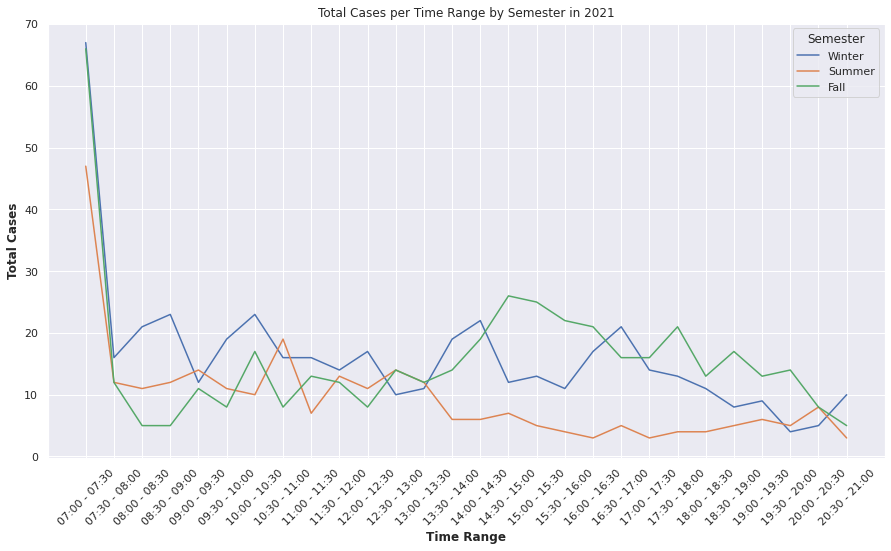

In [8]:
df_semester = pd.read_excel(timeRangeDataPath, sheet_name="Semester");

def getLineChart_Semester(dataframe_semester, hueColumn, xColumn):
  dataframeTransposed_Semester = getTransposedDataframe(dataframe_semester, hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.lineplot(data=dataframeTransposed_Semester, x=xColumn, y="Total Cases", hue=hueColumn);
    plt.ylabel("Total Cases", fontweight="bold");
    plt.xlabel(xColumn, fontweight="bold");
    plt.title(f"Total Cases per {xColumn} by {hueColumn} in 2021");
    plt.xticks(rotation=45);
  return chart;

lineChart_Semester = getLineChart_Semester(df_semester, "Semester", "Time Range");
lineChart_Semester

Semester - Time of Day

<AxesSubplot:title={'center':'Total Cases per Time of Day by Semester in 2021'}, xlabel='Time of Day', ylabel='Total Cases'>

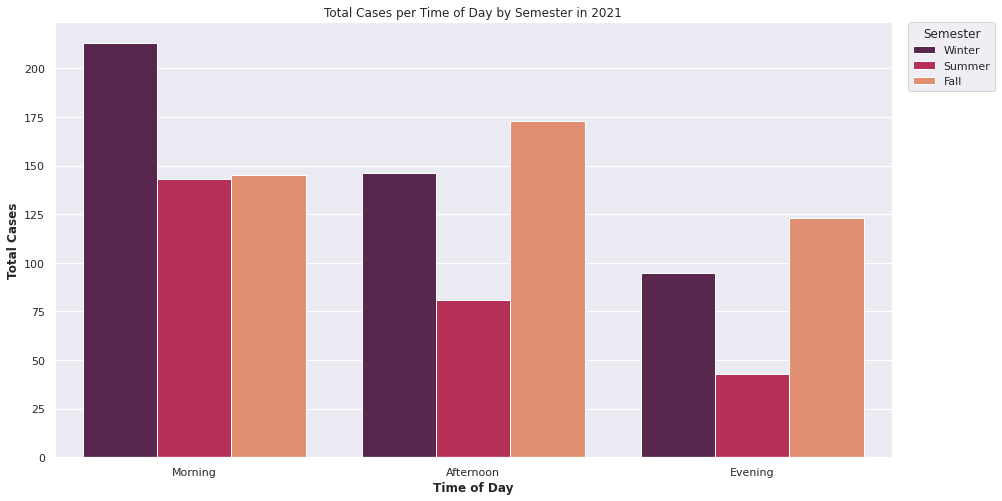

In [9]:
df_semester_timeOfDay = pd.read_excel(timeRangeDataPath, sheet_name="Semester - Time of Day");

# Reference: https://www.statology.org/seaborn-legend-position/

def getBarChart_Semester_TimeOfDay(dataframe_semester_timeOfDay, hueColumn, xColumn):
  dataframeTransposed_semester_timeOfDay = getTransposedDataframe(dataframe_semester_timeOfDay, hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.barplot(data=dataframeTransposed_semester_timeOfDay, x=xColumn, y="Total Cases", hue=hueColumn, palette="rocket");
    plt.ylabel("Total Cases", fontweight="bold");
    plt.xlabel(xColumn, fontweight="bold");
    plt.title(f"Total Cases per {xColumn} by {hueColumn} in 2021");
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title=hueColumn);
  return chart;

barChart_Semester_TimeOfDay = getBarChart_Semester_TimeOfDay(df_semester_timeOfDay, "Semester", "Time of Day");
barChart_Semester_TimeOfDay

Month

/var/folders/6l/mm7mjc7502v12t9w6jsrkdcr0000gn/T/ipykernel_1589/2746728040.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator


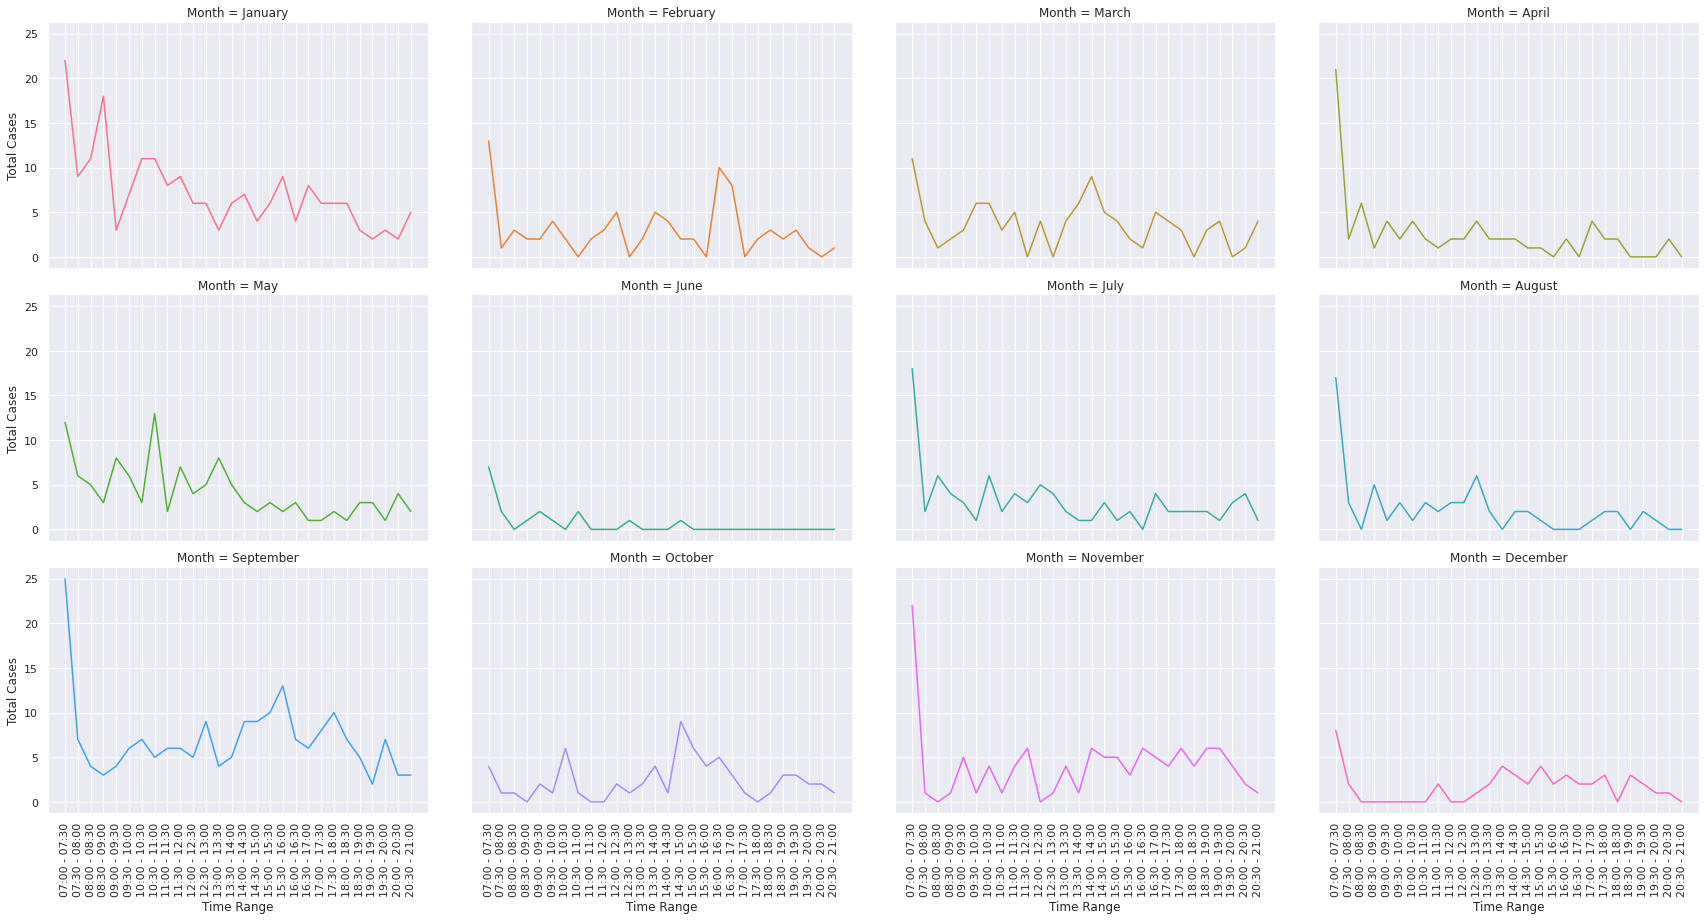

In [10]:
df_month = pd.read_excel(timeRangeDataPath, sheet_name="Month");

# Reference: https://stackoverflow.com/questions/26163702/how-to-change-figuresize-using-seaborn-factorplot

def getFacetGrid_Month(dataframe_month, hueColumn, xColumn):
  dataframeTransposed_month = getTransposedDataframe(df_month, hueColumn, xColumn)
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_month, col=hueColumn, hue=hueColumn, col_wrap=4, height=4, aspect=1.5);
    chartCollection = chart.map_dataframe(sns.lineplot, x=xColumn, y="Total Cases");
    for axes in chart.axes.flat:
      _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90);
  return chartCollection;

facetGrid_Month = getFacetGrid_Month(df_month, "Month", "Time Range");
facetGrid_Month

Month - Time of Day

<AxesSubplot:title={'center':'Total Cases per Time of Day by Month in 2021'}, xlabel='Time of Day', ylabel='Total Cases'>

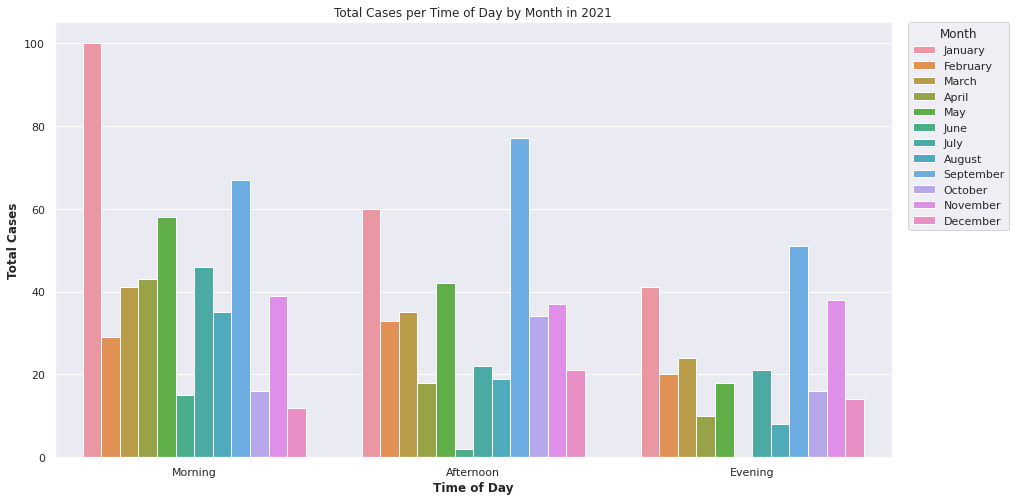

In [11]:
df_month_timeOfDay = pd.read_excel(timeRangeDataPath, sheet_name="Month - Time of Day");

def getBarChart_Month_TimeOfDay(dataframe_month_timeOfDay, hueColumn, xColumn):
  dataframeTransposed_month_timeOfDay = getTransposedDataframe(dataframe_month_timeOfDay, hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.barplot(data=dataframeTransposed_month_timeOfDay, x="Time of Day", y="Total Cases", hue="Month");
    plt.ylabel("Total Cases", fontweight="bold");
    plt.xlabel(xColumn, fontweight="bold");
    plt.title(f"Total Cases per {xColumn} by {hueColumn} in 2021");
    # plt.xticks(rotation=45);
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Month");
  return chart;

barChart_Month_TimeOfDay = getBarChart_Month_TimeOfDay(df_month_timeOfDay, "Month", "Time of Day");
barChart_Month_TimeOfDay

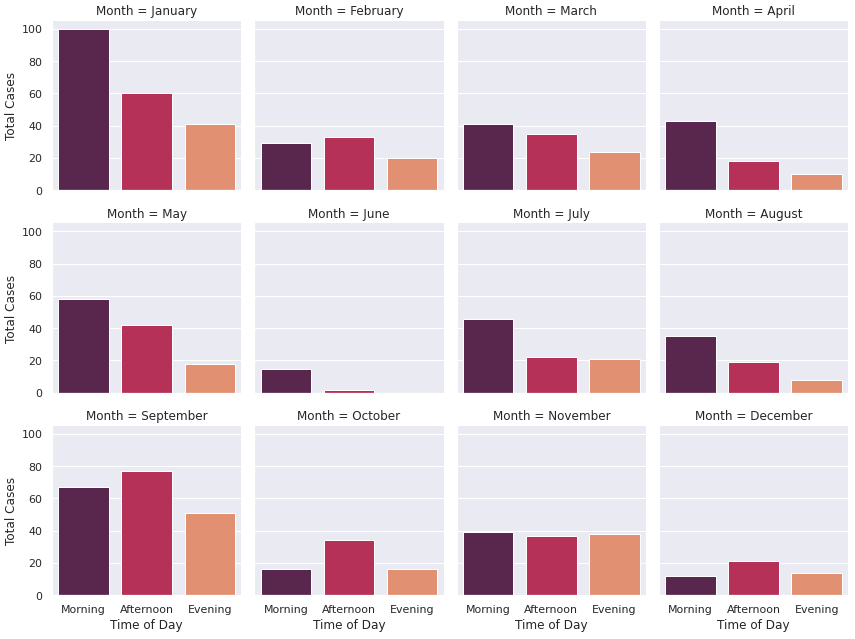

In [12]:
def getFacetGrid_Month_TimeOfDay(dataframe_month_timeOfDay, hueColumn, xColumn):
  dataframeTransposed_month_timeOfDay = getTransposedDataframe(dataframe_month_timeOfDay, hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_month_timeOfDay, col=hueColumn, col_wrap=4, height=3, aspect=1);
    chartCollection = chart.map_dataframe(sns.barplot, x=xColumn, y="Total Cases", palette="rocket");
    # for axes in chart.axes.flat:
    #   _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90);
  return chartCollection;

facetGrid_Month_TimeOfDay = getFacetGrid_Month_TimeOfDay(df_month_timeOfDay, "Month", "Time of Day");
facetGrid_Month_TimeOfDay

Weekday

<AxesSubplot:title={'center':'Total Cases per Time Range by Weekday in 2021'}, xlabel='Time Range', ylabel='Total Cases'>

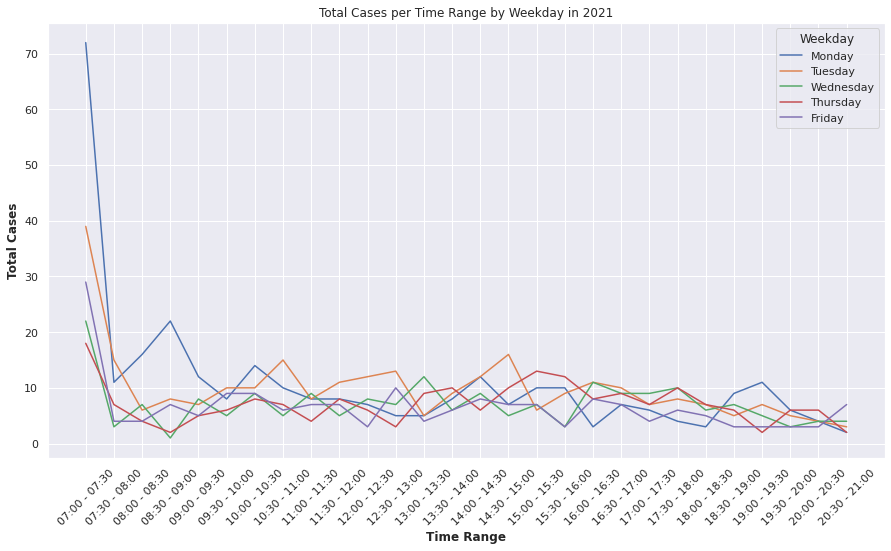

In [13]:
df_weekday = pd.read_excel(timeRangeDataPath, sheet_name="Weekday");

def getLineChart_Weekday(dataframe_weekday, hueColumn, xColumn):
  dataframeTransposed_weekday = getTransposedDataframe(dataframe_weekday, hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.lineplot(data=dataframeTransposed_weekday, x=xColumn, y="Total Cases", hue=hueColumn);
    plt.ylabel("Total Cases", fontweight="bold");
    plt.xlabel(xColumn, fontweight="bold");
    plt.title(f"Total Cases per {xColumn} by {hueColumn} in 2021");
    plt.xticks(rotation=45);
    # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Month");
  return chart;

lineChart_Weekday = getLineChart_Weekday(df_weekday, "Weekday", "Time Range");
lineChart_Weekday

Weekday - Time of Day

<AxesSubplot:title={'center':'Total Cases per Time of Day by Weekday in 2021'}, xlabel='Time of Day', ylabel='Total Cases'>

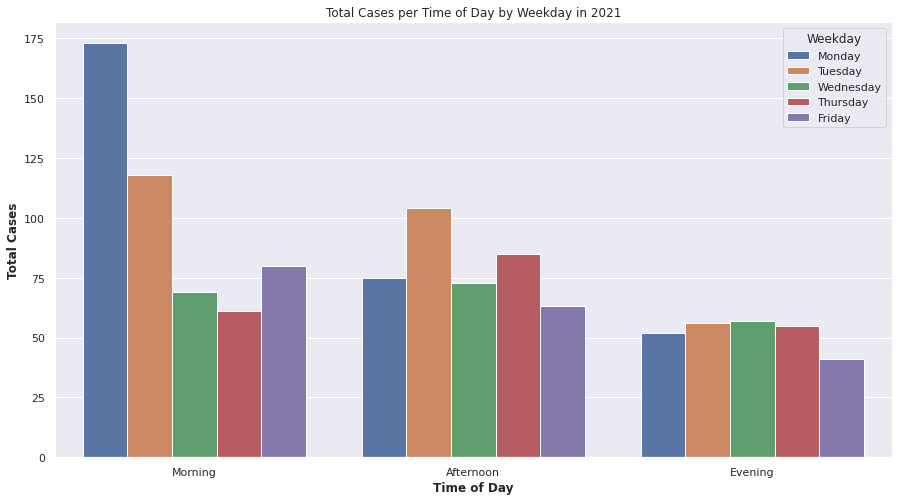

In [14]:
df_weekday_timeOfDay = pd.read_excel(timeRangeDataPath, sheet_name="Weekday - Time of Day");

def getBarChart_Weekday_TimeOfDay(dataframe_weekday_timeOfDay, hueColumn, xColumn):
  dataframeTransposed_weekday_timeOfDay = getTransposedDataframe(dataframe_weekday_timeOfDay, hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.barplot(data=dataframeTransposed_weekday_timeOfDay, x=xColumn, y="Total Cases", hue=hueColumn);
    # chart = sns.barplot(data=dataframeTransposed_weekday_timeOfDay, x="Time of Day", y="Total Cases", hue="Weekday", palette="viridis");
    plt.ylabel("Total Cases", fontweight="bold");
    plt.xlabel(xColumn, fontweight="bold");
    plt.title(f"Total Cases per {xColumn} by {hueColumn} in 2021");
    # plt.xticks(rotation=45);
    # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Month");
  return chart;

barChart_Weekday_TimeOfDay = getBarChart_Weekday_TimeOfDay(df_weekday_timeOfDay, "Weekday", "Time of Day");
barChart_Weekday_TimeOfDay

Weekday in Semester

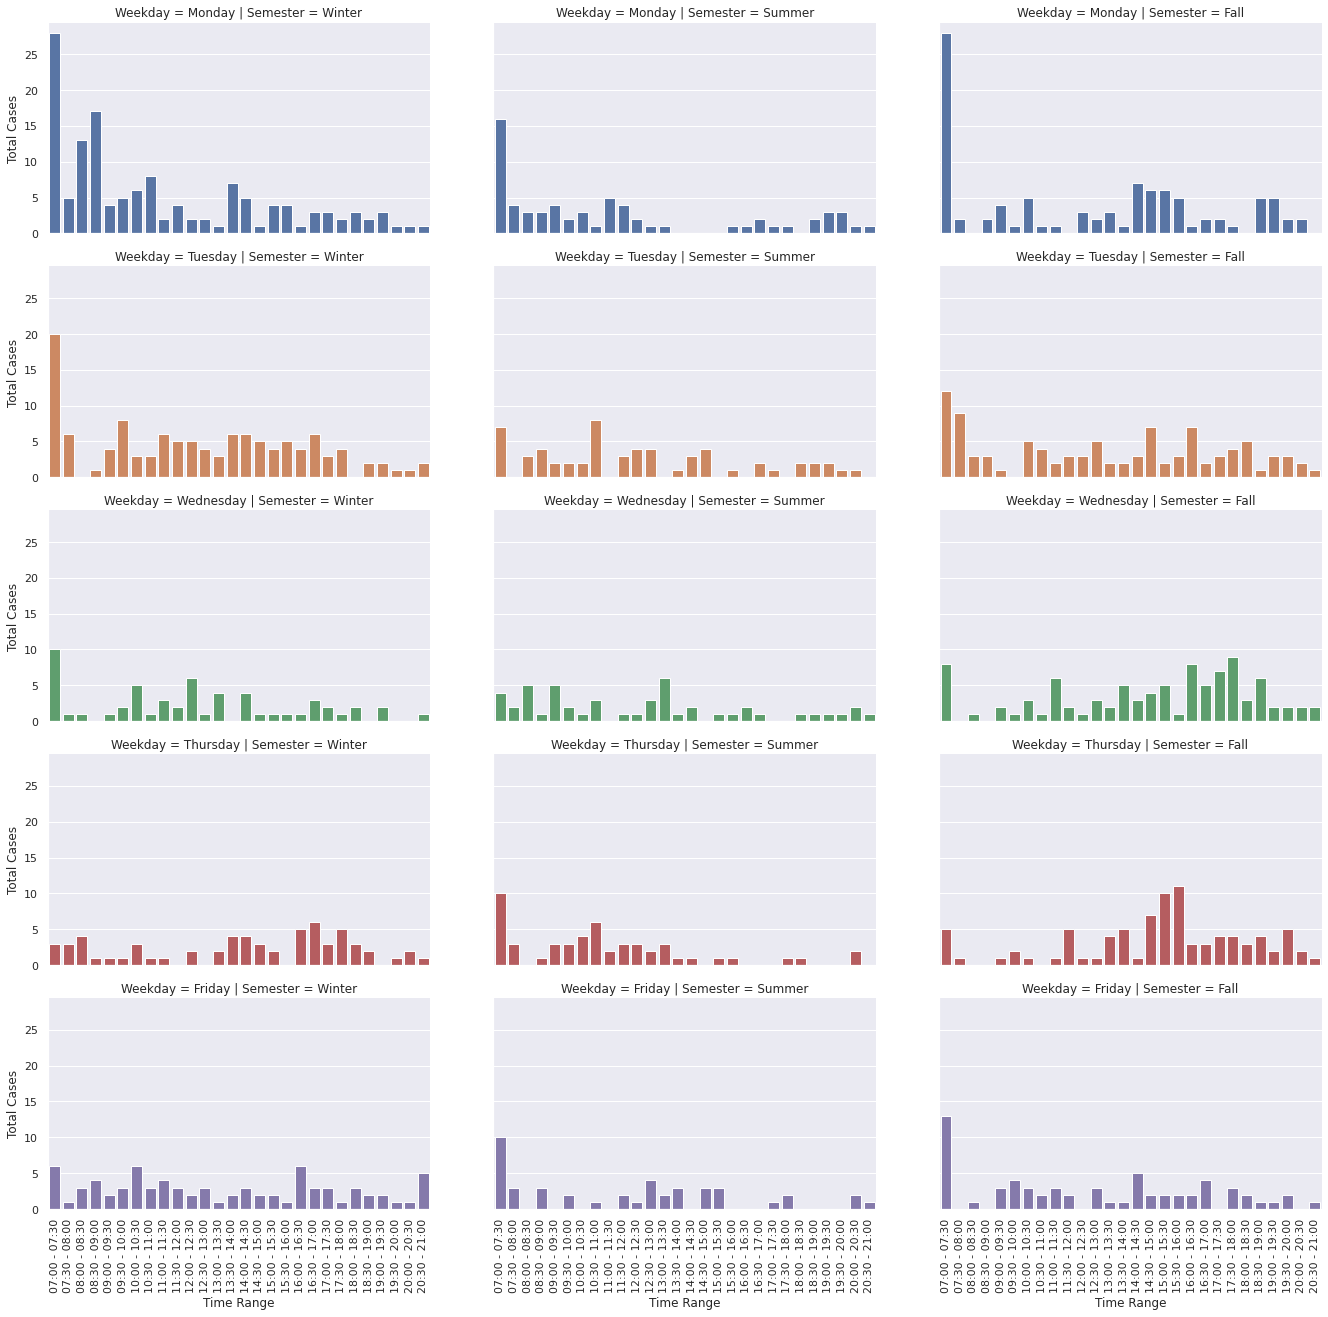

In [15]:
df_weekdayWinter = pd.read_excel(timeRangeDataPath, sheet_name="Weekday - Winter");
df_weekdaySummer = pd.read_excel(timeRangeDataPath, sheet_name="Weekday - Summer");
df_weekdayFall = pd.read_excel(timeRangeDataPath, sheet_name="Weekday - Fall");

def getTotalCasesPerWeekdayInSemester(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet):
  dataframeTransposed_winter = getTransposedDataframe(dataframeWinter, hueColumn, xColumn);
  dataframeTransposed_summer = getTransposedDataframe(dataframeSummer, hueColumn, xColumn);
  dataframeTransposed_fall = getTransposedDataframe(dataframeFall, hueColumn, xColumn);

  dataframeTransposed_winter[hueFacet] = "Winter";
  dataframeTransposed_summer[hueFacet] = "Summer";
  dataframeTransposed_fall[hueFacet] = "Fall";

  dataframeTransposedCombined = pd.concat([dataframeTransposed_winter,dataframeTransposed_summer,dataframeTransposed_fall]);
  cols = list(dataframeTransposedCombined.columns);
  cols = [cols[-1]] + cols[:-1];
  dataframeTransposedCombined = dataframeTransposedCombined[cols];

  return dataframeTransposedCombined;

def getFacetGrid_Weekday_Semester(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet):
  dataframeTransposed_weekday_semester = getTotalCasesPerWeekdayInSemester(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_weekday_semester, row=hueColumn, col=hueFacet, height=3.5, aspect=1.8, hue=hueColumn);
    chartCollection = chart.map_dataframe(sns.barplot, x=xColumn, y="Total Cases");
    for axes in chart.axes.flat:
      _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90);
  return chart;

facetGrid_Weekday_Semester = getFacetGrid_Weekday_Semester(df_weekdayWinter, df_weekdaySummer, df_weekdayFall, "Weekday", "Time Range", "Semester");
facetGrid_Weekday_Semester

Time of Day in Semester

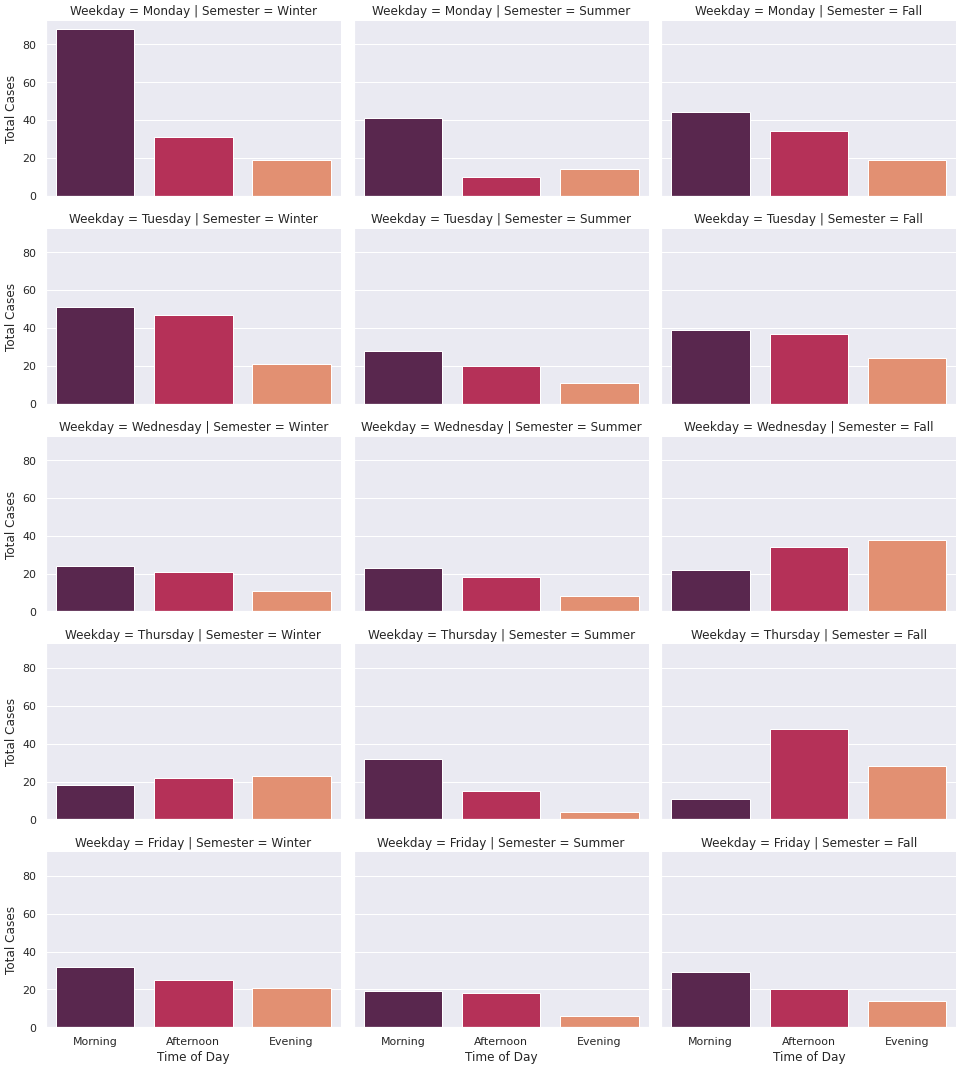

In [16]:
df_weekdayWinter_timeOfDay = pd.read_excel(timeRangeDataPath, sheet_name="Weekday - Time of Day (Winter)");
df_weekdaySummer_timeOfDay = pd.read_excel(timeRangeDataPath, sheet_name="Weekday - Time of Day (Summer)");
df_weekdayFall_timeOfDay = pd.read_excel(timeRangeDataPath, sheet_name="Weekday - Time of Day (Fall)");

def getFacetGrid_Weekday_Semester_TimeOfDay(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet):
  dataframeTransposed_weekday_semester = getTotalCasesPerWeekdayInSemester(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_weekday_semester, row=hueColumn, col=hueFacet, height=3, aspect=1.5, hue=hueColumn);
    chartCollection = chart.map_dataframe(sns.barplot, x=xColumn, y="Total Cases", palette="rocket");
    # for axes in chart.axes.flat:
    #   _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90);
  return chart;

facetGrid_Weekday_Semester_TimeOfDay = getFacetGrid_Weekday_Semester_TimeOfDay(df_weekdayWinter_timeOfDay, df_weekdaySummer_timeOfDay, df_weekdayFall_timeOfDay, "Weekday", "Time of Day", "Semester");
facetGrid_Weekday_Semester_TimeOfDay

Week

<AxesSubplot:title={'center':'Total Cases per Time Range by Week in 2021'}, xlabel='Week', ylabel='Time Range'>

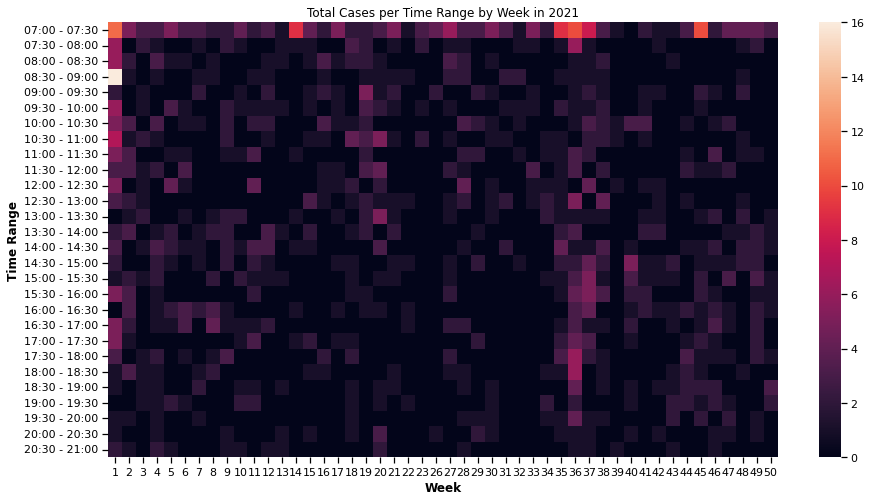

In [17]:
df_week = pd.read_excel(timeRangeDataPath, sheet_name="Week");

# Reference: 
# https://datascience.stackexchange.com/questions/31746/how-to-include-labels-in-sns-heatmap
# https://www.educative.io/edpresso/how-to-convert-float-to-string-in-python

def getHeatMapChart_Week(dataframe_week, hueColumn, xColumn):
  dataframeTransposed_week = getTransposedDataframe(dataframe_week, hueColumn, xColumn);
  dataframeTransposed_week_Pivot = dataframeTransposed_week.pivot(xColumn, hueColumn, "Total Cases");
  xColLabels = [];
  for colTick in dataframeTransposed_week[hueColumn].unique().tolist():
    xColLabels.append(str(int(colTick)));
  chart = sns.heatmap(dataframeTransposed_week_Pivot, xticklabels=xColLabels);
  plt.ylabel(xColumn, fontweight="bold");
  plt.xlabel(hueColumn, fontweight="bold");
  plt.title(f"Total Cases per {xColumn} by {hueColumn} in 2021");
  plt.xticks(rotation=0);
  return chart;

heatMap_Week = getHeatMapChart_Week(df_week, "Week", "Time Range");
heatMap_Week

Week - Time of Day

<AxesSubplot:title={'center':'Total Cases per Time of Day by Week in 2021'}, xlabel='Week', ylabel='Total Cases'>

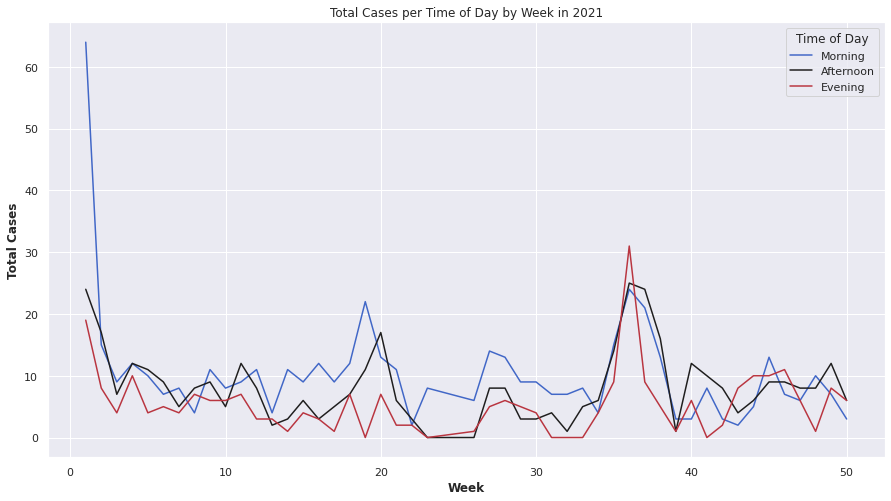

In [18]:
df_week_timeOfDay = pd.read_excel(timeRangeDataPath, sheet_name="Week - Time of Day");

def getLineChart_Week_TimeOfDay(dataframe_week_timeOfDay, hueColumn, xColumn):
  dataframeTransposed_weekday_timeOfDay = getTransposedDataframe(dataframe_week_timeOfDay, hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.lineplot(data=dataframeTransposed_weekday_timeOfDay, x=hueColumn, y="Total Cases", hue=xColumn, palette="icefire");
    plt.ylabel("Total Cases", fontweight="bold");
    plt.xlabel(hueColumn, fontweight="bold");
    plt.title(f"Total Cases per {xColumn} by {hueColumn} in 2021");
    # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Month");
  return chart;

lineChart_Week_TimeOfDay = getLineChart_Week_TimeOfDay(df_week_timeOfDay, "Week", "Time of Day");
lineChart_Week_TimeOfDay